In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
def f(y, t):
    return t+2*y

In [3]:
def Exactf(t_):
    return -0.5*t_ -(1 - np.exp(2*t_))/4

In [4]:
#Definimos discretización

Tmin, Tmax, Npoints = 0., 1, 10
t= np.linspace(Tmin, Tmax, Npoints)
deltat = (Tmax-Tmin)/float(Npoints-1)
print(deltat)

0.1111111111111111


In [5]:
y = np.zeros(Npoints)
yexact = np.zeros(Npoints)
yexact = Exactf(t)

In [6]:
# Condicion inicial
y[0] = 0

In [7]:
# Implementar el método 

def GetEuler(y, t, deltat):
    print('Corriendo Euler')
    
    for i in range(1, Npoints):
        # Futuro  #Presente
        y[i] = y[i-1] + deltat*f(y[i-1], t[i-1])

GetEuler(y, t, deltat)

Corriendo Euler


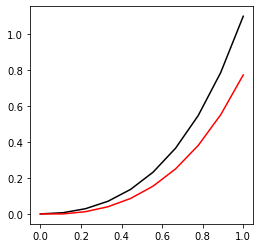

In [8]:
plt.figure( figsize = (4,4))
plt.plot(t, yexact, c = 'k', label = 'Exact')
plt.plot(t, y, c = 'r', label = 'Euler')
plt.show()

## Estudiemos la estabilidad del método de Euler

In [9]:
def fc(z):
    return 1.j*z

def ComplexEuler():
    global t
    global deltat
    global z
    
    z += fc(z)*deltat
    t += deltat

In [10]:
t = 0
TMax = 2*np.pi

z = 1
Npoints = 300

deltat = TMax/np.int(Npoints)

#Tiempo 0

data = [[t, z]]

for i in range(Npoints):
    ComplexEuler()
    data.append([t,z])
    
data = np.array(data)

print(data[-1])

[6.28318531+0.j         1.06799442-0.00098091j]


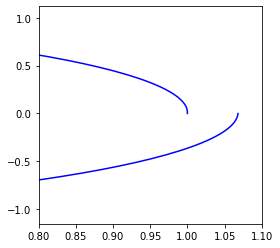

In [11]:
plt.figure( figsize = (4,4))
plt.plot(np.real(data[:,1]), np.imag(data[:,1]) ,c = 'b', label = 'Exact')
plt.xlim(0.8, 1.1)
plt.show()

In [12]:
# Implementando Euler mejorado o RK2

def GetEulerMejorado(y, t, deltat):
    print('Corriendo Euler mejorado')
    
    for i in range(1, Npoints):
        k1 = f(y[i-1], t[i-1])
        k2 = f(y[i-1] + deltat*k1, t[i-1]+deltat)
        y[i] = y[i-1] +0.5*deltat*(k1+k2) 

In [22]:
Tmin, Tmax, Npoints = 0., 1, 10
t= np.linspace(Tmin, Tmax, Npoints)
deltat = (Tmax-Tmin)/float(Npoints-1)
print(deltat)

0.1111111111111111


In [14]:
y1 = np.zeros(Npoints)
y1[0] = 0
GetEulerMejorado(y1, t, deltat)

Corriendo Euler mejorado


In [15]:
for i in range(Npoints):
    print(yexact[i], y[i], y1[i])

-0.0 0.0 0.0
0.006656661694864979 0.0 0.006172839506172839
0.028794763290584058 0.012345679012345678 0.027587258039932932
0.07026684359700228 0.03978052126200274 0.06800660844759812
0.1358841413495797 0.08565767413504038 0.132123466500503
0.2316551666015929 0.15407542888109874 0.2257890686542623
0.36508364033746105 0.25004280813862684 0.3562994011066179
0.5455405760218808 0.3796819506879513 0.5327519281288281
0.7847289532216379 0.5504754705939158 0.7664904014665359
1.0972640247326626 0.7715687850468846 1.0716594992223336


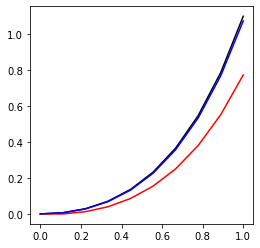

In [16]:
plt.figure( figsize = (4,4))
plt.plot(t, yexact, c = 'k', label = 'Exact')
plt.plot(t, y, c = 'r', label = 'Euler')
plt.plot(t, y1, c = 'b', label = 'Euler Mejorado')
plt.show()

In [17]:
def fc(z):
    return 1.j*z

def ComplexEulerMejorado():
    global t
    global deltat
    global z
    
    k1 = fc(z)
    k2 = fc(z+fc(z)*deltat)
    z += 0.5*deltat*(k1+k2)
    t += deltat

In [18]:
t = 0
TMax = 2*np.pi

z = 1
Npoints = 300

deltat = TMax/np.int(Npoints)

#Tiempo 0

data = [[t, z]]

for i in range(Npoints):
    ComplexEulerMejorado()
    data.append([t,z])
    
data = np.array(data)

print(data[-1])

[6.28318531+0.j        1.00000711+0.0004593j]


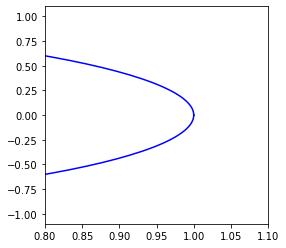

In [19]:
plt.figure( figsize = (4,4))
plt.plot(np.real(data[:,1]), np.imag(data[:,1]) ,c = 'b', label = 'Exact')
plt.xlim(0.8, 1.1)
plt.show()

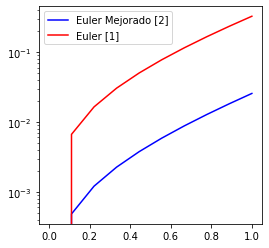

In [24]:
plt.figure( figsize = (4,4))
t= np.linspace(Tmin, Tmax, Npoints)
plt.plot(t, np.abs(yexact-y1), c = 'b', label = 'Euler Mejorado [2]')
plt.plot(t, np.abs(yexact-y), c = 'r', label = 'Euler [1]')
plt.legend(loc = 0)
plt.yscale('log')
plt.show()

## Ecuaciones diferenciales de segundo orden

In [26]:
Tmin, Tmax, Npoints = 0., 1, 11
t= np.linspace(Tmin, Tmax, Npoints)
deltat = (Tmax-Tmin)/float(Npoints-1)
print(deltat)

0.1


In [27]:
# Definimos los array 

yexact  = np.zeros(Npoints)

x = np.zeros(Npoints)
y = np.zeros(Npoints)

In [29]:
# Condiciones inidicales 
x[0], y[0] = 0, 1
yexacta = np.sinh(t)

In [32]:
# Definimos las funciones

def f(x, y, t):
    return y

def g(x, y, t):
    return 2*np.exp(t) -2*y -x

In [39]:
# Implementamos

def GetEuler2Orden(x, y, t, deltat):
    print('Corriendo Euler para orden 2')
    for i in range(1, Npoints):
        x[i] = x[i-1] +f(x[i-1], y[i-1], t[i-1])*deltat
        y[i] = y[i-1] +g(x[i-1], y[i-1], t[i-1])*deltat

In [40]:
GetEuler2Orden(x, y , t, deltat)   

Corriendo Euler para orden 2


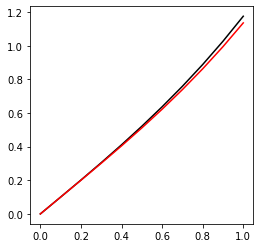

In [42]:
plt.figure( figsize = (4,4))
plt.plot(t, yexacta, c = 'k', label = 'Exact')
plt.plot(t, x, c = 'r', label = 'Euler 2 orden')
plt.show()

## Oscilador armónico

In [69]:
Tmin, Tmax, Npoints = 0., 10, 1000
t= np.linspace(Tmin, Tmax, Npoints)
deltat = (Tmax-Tmin)/float(Npoints-1)
print(deltat)

0.01001001001001001


In [70]:
# Definimos los array 

yexact  = np.zeros(Npoints)

theta = np.zeros(Npoints)
omega = np.zeros(Npoints)

In [71]:
# Condiciones inidicales 
theta[0], omega[0] = (89*np.pi)/100, 0
yexacta = np.sinh(t)
w = 1

In [72]:
# Definimos las funciones

def f(theta, omega, t):
    return omega

def g(theta, omega, t):
    return -theta*(w**2)
    #return -np.sin((w**2)*omega)

In [74]:
GetEuler2Orden(theta, omega , t, deltat)   

Corriendo Euler para orden 2


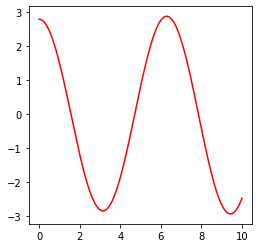

In [75]:
plt.figure( figsize = (4,4))
#plt.plot(t, yexacta, c = 'k', label = 'Exact')
plt.plot(t, theta, c = 'r', label = 'Euler 2 orden')
plt.show()

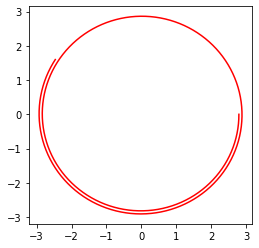

In [78]:
plt.figure( figsize = (4,4))
plt.plot(theta, omega ,c = 'r', label = 'Exact')

plt.show()